Load ACS data into dataframes.  Join and save pickled result

### DP04 Housing data
Using hu for housing units   
Since >95% report one race, leave out responses of 2 or more races.  
Since White is the most reported signle race, use other race categories as features  


In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.discrete import discrete_model

In [5]:
DP04 = pd.read_csv('Data/ACS_14_5YR_DP04.csv', skiprows=0)

In [1]:
## Drop the 2nd header row
DP04 = DP04.iloc[1:,:].copy()

NameError: name 'DP04' is not defined

In [7]:
DP04.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC03_VC201,HC04_VC201,HC01_VC202,HC02_VC202,HC03_VC202,HC04_VC202,HC01_VC205,HC02_VC205,HC03_VC205,HC04_VC205
1,0600000US3400100000,3400100000,"County subdivisions not defined, Atlantic Coun...",0,12,0,NaN,0,12,NaN,...,NaN,NaN,0,12,NaN,NaN,0,12,NaN,NaN
2,0600000US3400100100,3400100100,"Absecon city, Atlantic County, New Jersey",3463,206,3463,NaN,3247,181,93.8,...,19.6,14.7,300,96,58.7,15.0,28,32,NaN,NaN
3,0600000US3400102080,3400102080,"Atlantic City city, Atlantic County, New Jersey",20555,544,20555,NaN,15847,443,77.1,...,10.0,2.0,5643,353,52.9,2.6,487,155,NaN,NaN
4,0600000US3400107810,3400107810,"Brigantine city, Atlantic County, New Jersey",9386,300,9386,NaN,4379,198,46.7,...,6.7,4.2,717,152,59.1,8.4,152,89,NaN,NaN
5,0600000US3400108680,3400108680,"Buena borough, Atlantic County, New Jersey",1918,171,1918,NaN,1751,152,91.3,...,18.2,11.3,313,107,45.2,11.7,9,14,NaN,NaN


In [8]:
housing = DP04[['GEO.id2', 'GEO.display-label', 
                'HC03_VC14',
                'HC03_VC15',
                'HC03_VC20',
                'HC03_VC21',
                'HC03_VC27',
                'HC03_VC35',
                'HC03_VC40',
                'HC03_VC41',
                'HC03_VC42',
                'HC03_VC43',
                'HC03_VC44',
                'HC03_VC45',
                'HC03_VC46',
                'HC03_VC47',
                'HC03_VC48',
                'HC01_VC49',
                'HC03_VC64',
                'HC01_VC68',
                'HC01_VC69',
                'HC03_VC79',
                'HC03_VC84',
                'HC03_VC85',
                'HC03_VC86',
                'HC03_VC87',
                'HC03_VC112',
                'HC03_VC119',
                'HC03_VC126',
                'HC01_VC127',
                'HC03_VC132',
                'HC01_VC189',
                'HC03_VC188'
               ]].copy()

housing.columns = ['FIPS','city_town', 
                   'p_1hu_bldg_det',
                   'p_1hu_bldg_att',
                   'p_20hu_bldg',
                   'p_hu_mobile',
                   'p_hu_gt_2010',
                   'p_hu_lt_1939',
                   'p_hu_1room',
                   'p_hu_2room',
                   'p_hu_3room',
                   'p_hu_4room',
                   'p_hu_5room',
                   'p_hu_6room',
                   'p_hu_7room',
                   'p_hu_8room',
                   'p_hu_gt8room',
                   'num_room_med',
                   'p_hu_own_occ',
                   'hh_size_own_occ',
                   'hh_size_rent_occ',
                   'p_hh_from1969',
                   'p_hu_nocar',
                   'p_hu_1car',
                   'p_hu_2car',
                   'p_hu_3car',
                   'p_hu_1perroom',
                   'p_hu_under50K',
                   'p_hu_over1MM',
                   'hu_val_median',
                   'p_hu_mortgage',
                   'gross_rent_med',
                   'p_hu_rentgt1500'
                   
               ]


In [9]:
housing = housing.iloc[:,:2].join(housing.iloc[:,2:].apply(pd.to_numeric)).fillna(0)


In [10]:
housing.head()

,FIPS,city_town,p_1hu_bldg_det,p_1hu_bldg_att,p_20hu_bldg,p_hu_mobile,p_hu_gt_2010,p_hu_lt_1939,p_hu_1room,p_hu_2room,...,p_hu_1car,p_hu_2car,p_hu_3car,p_hu_1perroom,p_hu_under50K,p_hu_over1MM,hu_val_median,p_hu_mortgage,gross_rent_med,p_hu_rentgt1500
1,3400100000,"County subdivisions not defined, Atlantic Coun...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3400100100,"Absecon city, Atlantic County, New Jersey",74.8,8.3,3.0,0.5,0.4,9.0,0.6,0.3,...,33.1,42.3,20.4,98.2,2.1,0.9,222000.0,76.3,1312.0,21.9
3,3400102080,"Atlantic City city, Atlantic County, New Jersey",17.9,12.6,34.4,0.3,0.3,25.8,9.9,5.3,...,38.4,12.9,2.5,92.1,4.0,2.0,201600.0,61.2,844.0,7.2
4,3400107810,"Brigantine city, Atlantic County, New Jersey",51.0,12.0,8.3,0.5,0.4,3.5,0.8,1.9,...,44.2,33.7,14.0,99.1,2.3,5.8,369700.0,59.6,1237.0,23.8
5,3400108680,"Buena borough, Atlantic County, New Jersey",63.3,4.3,5.6,1.3,0.0,16.3,2.9,3.2,...,32.0,36.4,20.0,98.5,1.1,1.0,189800.0,68.9,861.0,1.3


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 33 columns):
FIPS                570 non-null object
city_town           570 non-null object
p_1hu_bldg_det      570 non-null float64
p_1hu_bldg_att      570 non-null float64
p_20hu_bldg         570 non-null float64
p_hu_mobile         570 non-null float64
p_hu_gt_2010        570 non-null float64
p_hu_lt_1939        570 non-null float64
p_hu_1room          570 non-null float64
p_hu_2room          570 non-null float64
p_hu_3room          570 non-null float64
p_hu_4room          570 non-null float64
p_hu_5room          570 non-null float64
p_hu_6room          570 non-null float64
p_hu_7room          570 non-null float64
p_hu_8room          570 non-null float64
p_hu_gt8room        570 non-null float64
num_room_med        570 non-null float64
p_hu_own_occ        570 non-null float64
hh_size_own_occ     570 non-null float64
hh_size_rent_occ    570 non-null float64
p_hh_from1969       570 non-null flo

In [12]:
housing.to_pickle('housing.pkl')

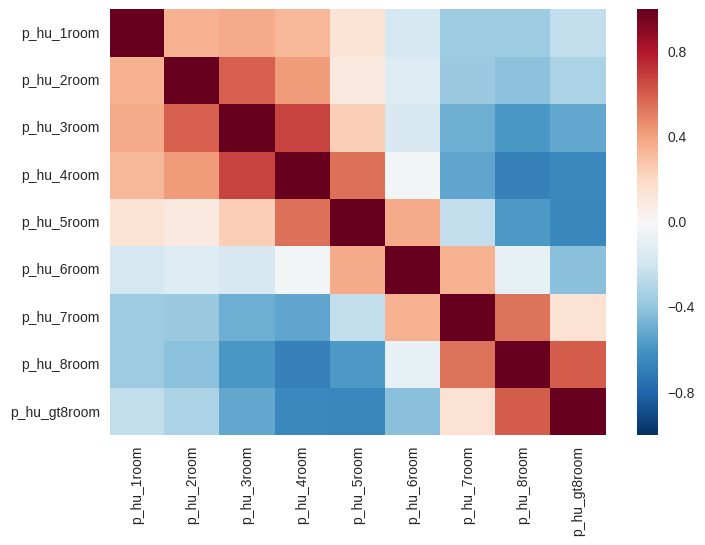

In [13]:
sb.heatmap(housing.loc[:,'p_hu_1room':'p_hu_gt8room'].corr());

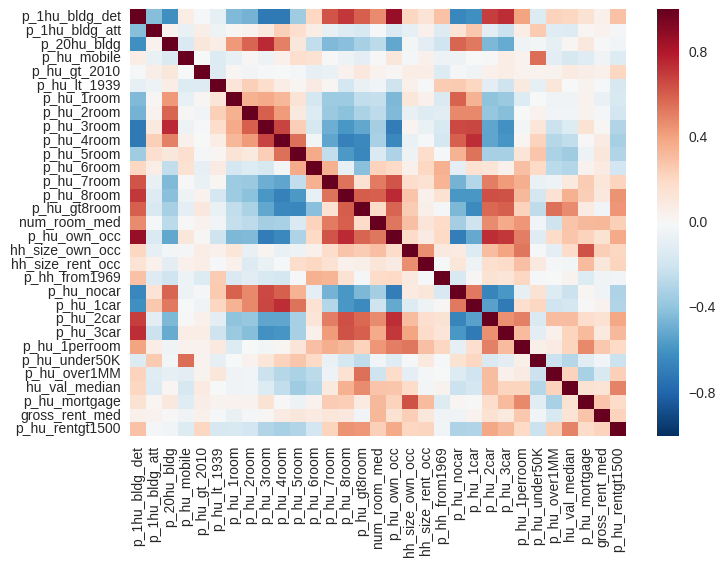

In [14]:
sb.heatmap(housing.corr());

In [17]:
from sklearn import preprocessing
X = housing.loc[:,'p_1hu_bldg_det':'p_hu_rentgt1500']
X = X[X['p_1hu_bldg_det'] != 0]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 2 to 570
Data columns (total 31 columns):
p_1hu_bldg_det      565 non-null float64
p_1hu_bldg_att      565 non-null float64
p_20hu_bldg         565 non-null float64
p_hu_mobile         565 non-null float64
p_hu_gt_2010        565 non-null float64
p_hu_lt_1939        565 non-null float64
p_hu_1room          565 non-null float64
p_hu_2room          565 non-null float64
p_hu_3room          565 non-null float64
p_hu_4room          565 non-null float64
p_hu_5room          565 non-null float64
p_hu_6room          565 non-null float64
p_hu_7room          565 non-null float64
p_hu_8room          565 non-null float64
p_hu_gt8room        565 non-null float64
num_room_med        565 non-null float64
p_hu_own_occ        565 non-null float64
hh_size_own_occ     565 non-null float64
hh_size_rent_occ    565 non-null float64
p_hh_from1969       565 non-null float64
p_hu_nocar          565 non-null float64
p_hu_1car           565 non-null f

In [23]:
X_scaled = preprocessing.scale(X)
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.364098,0.042907,-0.385402,-0.203817,-0.200297,-0.786061,-0.366228,-0.754387,-0.756069,-0.187341,...,0.146472,0.220888,-0.056998,0.010345,-0.234350,-0.342823,-0.713031,0.800790,0.278867,-0.560811
1,-2.101508,0.510986,3.533335,-0.262675,-0.286816,0.359768,3.416636,2.225399,2.202706,1.470920,...,0.666400,-3.013566,-2.069752,-2.319970,0.414708,-0.255551,-0.829099,-0.639605,-0.909554,-1.238804
2,-0.667210,0.445673,0.276041,-0.203817,-0.200297,-1.161184,-0.284876,0.199145,-0.093174,0.529365,...,1.235377,-0.725245,-0.776642,0.354162,-0.166028,0.045932,0.127324,-0.792230,0.088415,-0.473179
3,-0.134223,-0.392517,-0.060920,0.031617,-0.546375,-0.288171,0.569319,0.973889,0.650561,0.782320,...,0.038563,-0.428203,-0.101976,0.124951,-0.575959,-0.334889,-0.896236,0.094901,-0.866385,-1.510924
4,0.489762,-0.795283,-0.697403,3.739694,-0.113777,-0.874727,-0.610283,-0.277621,-0.368033,-0.524615,...,0.038563,0.407914,-0.248154,0.277758,1.439536,-0.414227,-0.941184,-0.343895,-0.061408,-1.091214
5,0.533094,0.217076,-0.759803,2.327093,0.145782,-0.431400,-0.610283,-0.456408,-0.836910,0.388835,...,-0.412695,-0.527217,1.494733,0.048547,-0.575959,-0.414227,-0.489998,-0.420208,0.179832,-0.150325
6,0.403097,-0.327203,-0.585082,2.415381,0.924458,-1.058878,-0.366228,-0.337217,-0.319529,-0.173288,...,-0.069347,0.231889,0.179135,0.124951,1.542019,-0.366624,-0.657842,0.361994,-0.188376,-0.224120
7,0.229768,-0.621114,-0.672443,-0.144958,-0.200297,1.669286,-0.610283,0.437527,-0.513547,0.388835,...,0.921458,-1.110299,0.077935,-1.364923,0.551351,-0.414227,-0.991253,0.085362,-0.480402,-0.763748
8,1.035749,-0.827940,-0.635003,1.532505,-0.546375,-0.956571,-0.610283,-0.694791,-0.642892,-0.622986,...,-1.766468,0.935988,1.494733,0.697979,0.141420,-0.303154,-0.492274,0.934337,0.281406,-0.168774
9,1.321742,-0.827940,-0.759803,0.355338,-0.546375,-0.983853,-0.610283,-0.933174,-1.176442,-0.904047,...,-0.471555,0.891982,0.280335,0.010345,0.346386,-0.350757,-0.831375,0.056745,0.918785,1.071908


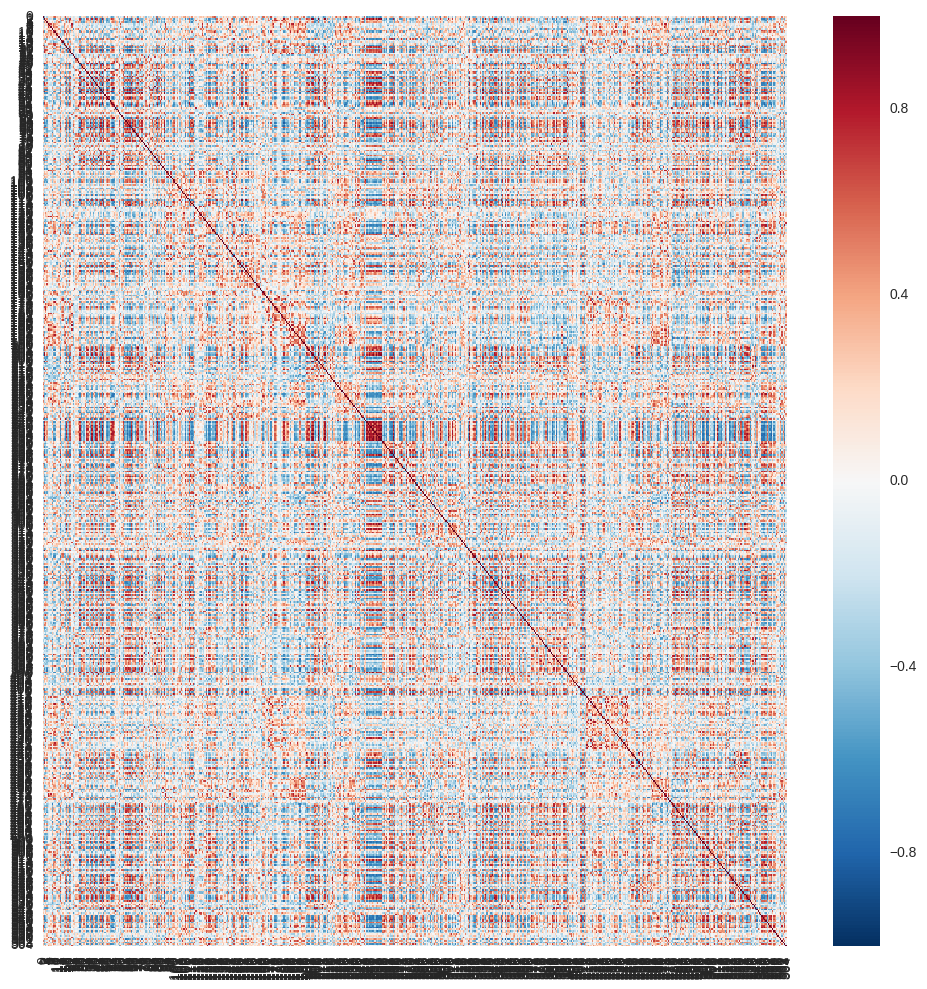

In [25]:
plt.figure(figsize=(12, 12))
sb.heatmap(pd.DataFrame(X_scaled).T.corr());